### IMPORTS

In [165]:
import sys
import os
sys.executable

'c:\\Users\\luisb\\AppData\\Local\\Programs\\Python\\Python312\\python.exe'

In [166]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [167]:
def get_pareto(arr):
    # Convert the array to a numpy array
    arr_np = np.array(arr)

    # Initialize a boolean mask to keep track of pareto-efficient elements
    is_pareto_efficient = np.ones(arr_np.shape[0], dtype=bool)

    for i in range(arr_np.shape[0]):
        if is_pareto_efficient[i]:
            for j in range(arr_np.shape[0]):
                if j != i and is_pareto_efficient[j]:
                    # Check if arr[i] dominates arr[j] in all dimensions
                    if np.all(arr_np[i] <= arr_np[j]) and np.any(arr_np[i] < arr_np[j]):
                        is_pareto_efficient[j] = False

    # Return the pareto-efficient elements
    return is_pareto_efficient
    

### Visualization

In [168]:
print(os.listdir("saves"))
savefile = os.listdir("saves")[-1]
"Visualizing data from: " + savefile

['pareto.csv', 'saves_1710424156961.csv', 'saves_1710424454746.csv', 'saves_1710424515049.csv', 'saves_1710424637019.csv', 'saves_1710424916129.csv']


'Visualizing data from: saves_1710424916129.csv'

In [169]:
# Read CSV
contracts = pd.read_csv('saves/'+savefile, sep=';')
print(contracts.shape)
contracts.head()

(99999, 5)


,utilA,utilB,utilSum,contract,pareto
0,10414,9719,20133,"[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,1...",False
1,10403,9704,20107,"[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,1...",False
2,10410,9660,20070,"[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,1...",False
3,10360,9705,20065,"[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,1...",False
4,10356,9681,20037,"[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,1...",False


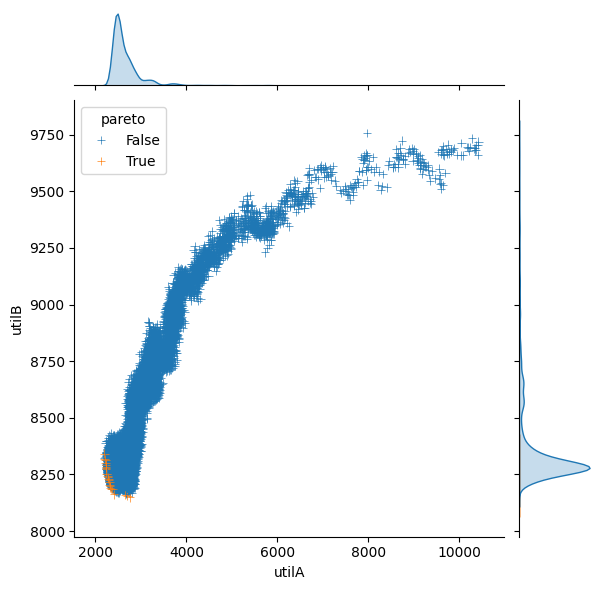

In [170]:
if "pareto" in contracts.columns:
    sns.jointplot(data=contracts, x="utilA", y="utilB", kind='scatter', hue="pareto", marker="+")
else:
    sns.jointplot(data=contracts, x="utilA", y="utilB", kind='scatter', marker="+")

In [171]:
# Determine pareto-efficient contracts if necessary
if "pareto" not in contracts.columns:
    contracts["pareto"] = get_pareto(contracts[["utilA","utilB"]])
    contracts = contracts.sort_values(by="utilSum", ascending=False).drop_duplicates()
    contracts.to_csv('saves/'+savefile, sep=';', index=False)
contracts

,utilA,utilB,utilSum,contract,pareto
0,10414,9719,20133,"[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,1...",False
1,10403,9704,20107,"[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,1...",False
2,10410,9660,20070,"[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,1...",False
3,10360,9705,20065,"[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,1...",False
4,10356,9681,20037,"[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,1...",False
...,...,...,...,...,...
99994,2261,8252,10513,"[4,67,193,48,10,1,91,129,8,84,122,73,174,135,2...",True
99995,2273,8240,10513,"[4,67,193,48,10,1,91,129,8,84,122,73,174,135,2...",True
99996,2266,8242,10508,"[4,67,193,48,10,1,91,129,8,84,122,73,174,135,2...",True
99997,2253,8253,10506,"[4,67,193,48,10,1,91,129,8,84,122,73,174,135,2...",False
